# **Air Quality Analysis (India)**

This exploratory data analysis (EDA) project aims to examine the real-time air quality data sourced from [data.gov.in](https://data.gov.in/resource/real-time-air-quality-index-various-locations). The goal is to uncover meaningful insights about air pollution levels across Indian cities using Python-based analysis and visualization tools.

## **Objectives**

1. Compare average pollution levels across Indian states and cities.
2. Analyze correlations among pollutant metrics.
3. Identify and visualize the most polluted monitoring stations.
4. Study temporal trends in pollution levels using timestamps.
5. Visualize spatial distribution using geographic coordinates.

## **Tools & Libraries**
We will use the following libraries for data processing and visualization:

- `Pandas` for data manipulation  
- `NumPy` for numerical operations  
- `Matplotlib` & `Seaborn` for plotting  
- `Jupyter Notebook` for step-by-step exploration


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
df = pd.read_csv('../data/air_quality_data.csv')
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"HB Colony, Vijayawada - APPCB",05-04-2025 21:00:00,16.536107,80.594233,CO,16.0,35.0,26.0
1,India,Andhra_Pradesh,Vijayawada,"Kanuru, Vijayawada - APPCB",05-04-2025 21:00:00,16.486692,80.699436,OZONE,24.0,43.0,37.0
2,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",05-04-2025 21:00:00,16.509717,80.612222,PM2.5,62.0,95.0,81.0
3,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",05-04-2025 21:00:00,16.509717,80.612222,NO2,49.0,66.0,56.0
4,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",05-04-2025 21:00:00,16.554731,80.649110,OZONE,34.0,112.0,51.0


## Initial Data Exploration

In [3]:
df.shape # shape (rows, columns)

(3229, 11)

In [4]:
df.info() # column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3229 non-null   object 
 1   state          3229 non-null   object 
 2   city           3229 non-null   object 
 3   station        3229 non-null   object 
 4   last_update    3229 non-null   object 
 5   latitude       3229 non-null   float64
 6   longitude      3229 non-null   float64
 7   pollutant_id   3229 non-null   object 
 8   pollutant_min  3005 non-null   float64
 9   pollutant_max  3005 non-null   float64
 10  pollutant_avg  3005 non-null   float64
dtypes: float64(5), object(6)
memory usage: 277.6+ KB


In [5]:
df.describe() # summary statistics for numerical columns

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3229.000000,3229.000000,3005.000000,3005.000000,3005.000000
mean,22.219637,78.817579,24.221963,83.195008,46.959401
std,5.558985,4.986845,26.534736,83.834664,43.953519
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,18.993616,75.565602,6.000000,21.000000,13.000000
50%,23.043070,77.502466,14.000000,58.000000,32.000000
75%,26.766433,80.936554,34.000000,115.000000,69.000000
max,34.066206,94.636574,222.000000,491.000000,303.000000


In [6]:
df.isnull().sum() # missing values in each column

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    224
pollutant_max    224
pollutant_avg    224
dtype: int64

In [7]:
df.duplicated().sum() # duplicate rows

np.int64(0)

## Data Cleaning & Preprocessing

In [8]:
df = df.drop_duplicates() # drops duplicate rows but we already have 0 duplicare rows
print("Duplicates removed.")

Duplicates removed.


In [9]:
df.isnull().sum() 

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    224
pollutant_max    224
pollutant_avg    224
dtype: int64

In [10]:
df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce') # converting last_update to datetime

In [11]:
df = df.dropna(subset = ['pollutant_min', 'pollutant_max', 'pollutant_avg'])
print(f"Rows with missing pollutant values dropped. Remaining rows: {df.shape[0]}")

Rows with missing pollutant values dropped. Remaining rows: 3005


In [12]:
# checking again
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3005 entries, 0 to 3228
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        3005 non-null   object        
 1   state          3005 non-null   object        
 2   city           3005 non-null   object        
 3   station        3005 non-null   object        
 4   last_update    3005 non-null   datetime64[ns]
 5   latitude       3005 non-null   float64       
 6   longitude      3005 non-null   float64       
 7   pollutant_id   3005 non-null   object        
 8   pollutant_min  3005 non-null   float64       
 9   pollutant_max  3005 non-null   float64       
 10  pollutant_avg  3005 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 281.7+ KB


country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

## Objective 1: Compare Average Pollution Levels Across States and Cities
Performing analysis on the average pollution (`pollutant_avg`) across different Indian states and cities. This helps identify the regions with relatively higher air pollution based on real-time monitoring data.

In [13]:
# state and city wise average pollution
state_wise_avg_poll = df.groupby('state')['pollutant_avg'].mean().sort_values(ascending=False)
city_wise_avg_poll = df.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False)

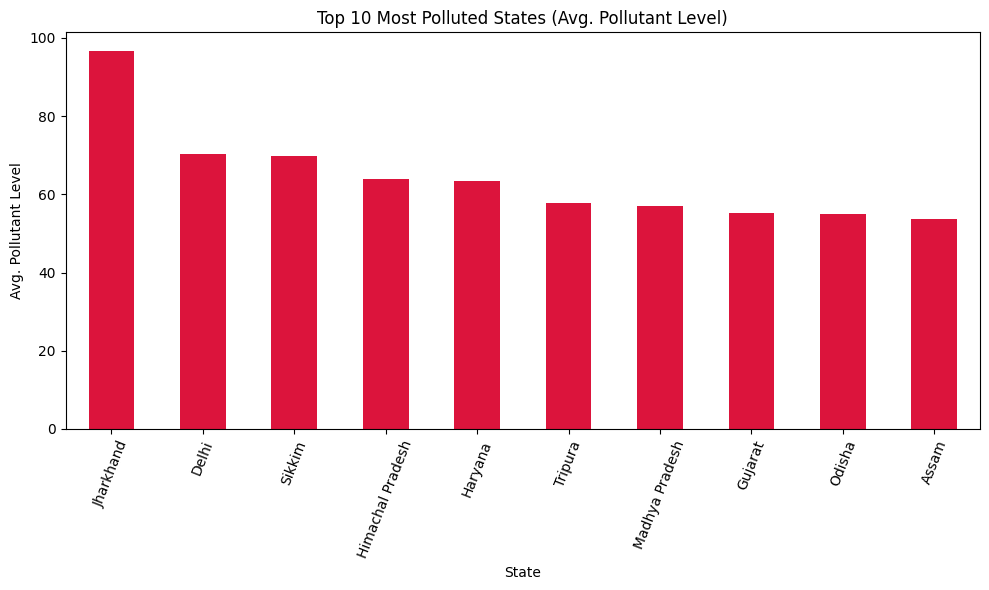

In [14]:
plt.figure(figsize = (10, 6))
state_wise_avg_poll.head(10).plot(kind='bar', color='crimson')
plt.title('Top 10 Most Polluted States (Avg. Pollutant Level)')
plt.ylabel('Avg. Pollutant Level')
plt.xlabel('State')
plt.xticks(rotation = 68.5)
plt.tight_layout()
plt.show()

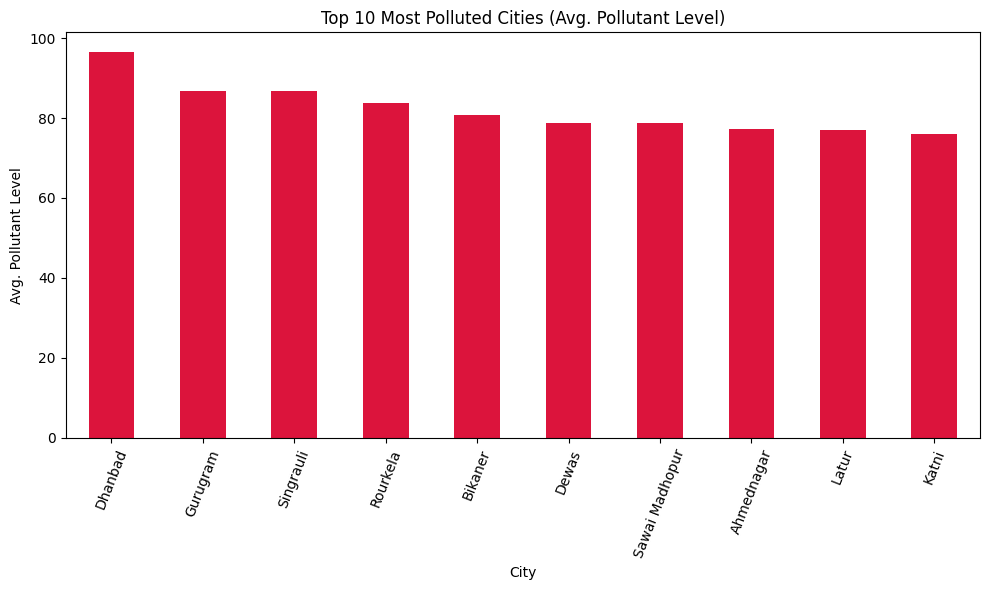

In [15]:
plt.figure(figsize = (10, 6))
city_wise_avg_poll.head(10).plot(kind='bar', color='crimson')
plt.title('Top 10 Most Polluted Cities (Avg. Pollutant Level)')
plt.ylabel('Avg. Pollutant Level')
plt.xlabel('City')
plt.xticks(rotation = 68.5)
plt.tight_layout()
plt.show()